# Table of Contents
 <p><div class="lev1"><a href="#Task-1.-Compiling-Ebola-Data"><span class="toc-item-num">Task 1.&nbsp;&nbsp;</span>Compiling Ebola Data</a></div>
 <div class="lev1"><a href="#Task-2.-RNA-Sequences"><span class="toc-item-num">Task 2.&nbsp;&nbsp;</span>RNA Sequences</a></div>
 <div class="lev1"><a href="#Task-3.-Class-War-in-Titanic"><span class="toc-item-num">Task 3.&nbsp;&nbsp;</span>Class War in Titanic</a></div></p>

In [241]:
from IPython.core.display import HTML
import pandas as pd
import numpy as np
import glob
import re
import string
import math

DATA_FOLDER = 'Data'  # Use the data folder provided in Tutorial 02 - Intro to Pandas.

## Task 1. Compiling Ebola Data

The `DATA_FOLDER/ebola` folder contains summarized reports of Ebola cases from three countries (Guinea, Liberia and Sierra Leone) during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

Use pandas to import these data files into a single `Dataframe`.
Using this `DataFrame`, calculate for *each country*, the *daily average per month* of *new cases* and *deaths*.
Make sure you handle all the different expressions for *new cases* and *deaths* that are used in the reports.

This next cell is use to suppress Pandas FutureWarnings which always come up on ambiguity from Column/Index names

In [242]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Helper functions to Format result tables from Dataframe.

We'll explain later why we use them. But we use cumulated data (which are increasing along the month). So what we do in this function is to divide the earliest and the latest data of each month by the number of elapsing days. From all the data point there is on each file.

To do so we have to update index to a sortable value representing only month and year (integer)


In [243]:
TOTAL_DEATH_DAILY_AVG = 'Total Death (daily avg.)'
NEW_CASES_DAILY_AVG = 'New cases (daily avg.)'

# We create a numerical index to sort by year month.
def only_year_month(x):
    return x.year * 100 + x.month

def avg_table_daily(table):
    new_indexes = reversed(list(set(table.index.map(only_year_month))))
    avg_result = pd.DataFrame(index=new_indexes, columns=[TOTAL_DEATH_DAILY_AVG, NEW_CASES_DAILY_AVG])
    old_index = table.index
    i = 0
    while i < len(old_index):
        new_ind = only_year_month(old_index[i])
        num_days = old_index[i+1].day - old_index[i].day + 1
        
        [x,y] = table['Total death'][old_index[i]:old_index[i+1]]
        avg_result[TOTAL_DEATH_DAILY_AVG][new_ind] = (y-x) / num_days
        
        [x,y] = table['New cases (cumul.)'][old_index[i]:old_index[i+1]]
        avg_result[NEW_CASES_DAILY_AVG][new_ind] = (y-x) / num_days
        i =  i + 2

    avg_result = avg_result.sort_index()
        
    return avg_result

Helper function to check headers from a list of files. It display set of different headers to be able to visually check if columns are missings

In [244]:
def check_headers(files):
    list_ = []
    for file_ in files:
        df = pd.read_csv(file_, header=None)
        list_.append(df.head(n=1))

    frame = pd.concat(list_)
    # Transpose to not drop record and better visualisation
    return frame.drop_duplicates().T

Helper function checking if dates are unique per file

In [245]:
def are_date_unique_per_file(files, lowercase=False):
    cols=['Date']
    if lowercase:
        cols=['date']
    for file_ in files:
        df = pd.read_csv(file_, usecols=cols)
        #print(file_, df.shape)
        if df.drop_duplicates().shape[0] > 1:
            return False
    return True

## Liberia

### Check structures of the files

#### Headers

In [246]:
allFiles = glob.glob(DATA_FOLDER + '/ebola/liberia_data/*.csv')

check_headers(allFiles)

,0,0,0,0,0,0,0,0,0,0
0,Date,Date,Date,Date,Date,Date,Date,Date,Date,Date
1,Variable,Variable,Variable,Variable,Variable,Variable,Variable,Variable,Variable,Variable
2,National,National,National,National,National,National,National,National,National,National
3,Bomi County,Bomi County,Bomi County,Bomi County,Bomi County,Bomi County,Bomi County,Bomi County,Bomi County,Bomi County
4,Bong County,Bong County,Bong County,Bong County,Bong County,Bong County,Bong County,Bong County,Bong County,Bong County
5,Grand Kru,Gbarpolu County,Gbarpolu County,Gbarpolu County,Grand Bassa,Grand Bassa,Grand Bassa,Gbarpolu County,Gbarpolu County,Gbarpolu County
6,Lofa County,Grand Bassa,Grand Bassa,Grand Bassa,Grand Cape Mount,Grand Cape Mount,Grand Cape Mount,Grand Bassa,Grand Bassa,Grand Bassa
7,Margibi County,Grand Cape Mount,Grand Cape Mount,Grand Cape Mount,Grand Gedeh,Grand Gedeh,Grand Gedeh,Grand Cape Mount,Grand Cape Mount,Grand Cape Mount
8,Maryland County,Grand Gedeh,Grand Gedeh,Grand Gedeh,Lofa County,Lofa County,Lofa County,Grand Gedeh,Grand Gedeh,Grand Gedeh
9,Montserrado County,Lofa County,Lofa County,Grand Kru,Margibi County,Margibi County,Margibi County,Lofa County,Lofa County,Grand Kru


In [247]:
are_date_unique_per_file(allFiles)

True

We wanted to use first the "Newly reported deaths" column, but they were disrepedancies with the cumulated data, and the newly reported data did not indicate if it was confirmed, suspected, etc. For the "Total death/s in confirmed cases",  less than half of the files didn't contain the value for this field. So either we switch to no data or more data but overestimation. Then we decided to switch to cumulated "Total death/s in confirmed, probable, suspected cases".

We also normalize most of the column by replacing new lines and repeating space since this is what we spotted


In [248]:
NEW_CASES = "New case/s (confirmed)"
TOTAL_NEW_CASES = "Total confirmed cases"
TOTAL_DEATH = "Total death/s in confirmed, probable, suspected cases"
NEWLY_REPORTED_DEATH = "Newly reported deaths"


# most of error are extra \n and spaces
def check_column_in_files(files, column_name, lower_case=False, descript=False):
    # Added lower_case boolean not to rewrite function as Sierre Leone data are lowercased.
    # Added descript boolean not to rewrite function as Guinea data are different.
    cols=['Variable', 'Date']
    if lower_case:
        cols=['variable', 'date']
    if descript:
        cols=['Description', 'Date']
    
    for file_ in allFiles:
        df = pd.read_csv(file_, index_col=cols).fillna(value=0)
        
        # normalize column names
        new_values = list(map(lambda x: re.sub("\s\s+" , " ", x.replace("\n", "")), df.index.levels[0].values.tolist()))
        df.index = df.index.set_levels(levels=new_values, level=0)
    
        is_column_present = column_name in df.index
        
        if not is_column_present:
            return False
        
    return True


to_check = [NEW_CASES, TOTAL_DEATH, NEWLY_REPORTED_DEATH, TOTAL_NEW_CASES]
list(map(lambda x: check_column_in_files(allFiles, x), to_check))

[True, True, True, True]

So, the both lines are available in each file, however a quick check in the files indicates that the cell may be empty.

Below, we found out that there is many NA values for the lasts months, only totals are available which mixes confirmed, probable and suspected cases. We have chosen along the way to consider only *confirmed cases*, so we are going to drop those data. First, let's check how many data we are going to drop.

Also, there is discrependencies between New deaths reported and cumulated data.

For the new cases, we also are going to use the cumulated data, except for the last file, were it seems that the cumulated data has moved to the new cases column. We patch manually this.

## More about cumulated data

We pick the earliest and the latest day in each month and we do the difference between the two to compute the average death and new cases per month. What happen is that the latest and the earliest day in the month do not match respectively with the end and the beginning of the month. We have two options from there. Assuming with have data from the 4th September to the 25th. And next month the data are starting at the 3rd of October. Either we don't take in account the gap or we try to interpolate the data. But we may not know the distribution of the new cases/death between each day so we found it was dangerous to interpolate. We will only do the averages on the data we have.

In the `2014-10-04-v142.csv` file, there is two Total deaths line, we keep only the second one (because it is the largest)

For the cumulated data, they are not always increasing, and we apply a `rolling` operation to correct values that decrease by replacing the ovbviously wrong value (nobody resuscitates!) by its precendent value. It may be incorrect but still better than discarding a value. We checked that it doesn't happen at the end or the beginning of a month. Rolling discard the very first and very last value, so we manually replace them.

In [249]:
allFiles = glob.glob(DATA_FOLDER + '/ebola/liberia_data/*.csv')

list_ = []

for file_ in allFiles:
    df = pd.read_csv(file_, index_col=['Variable', 'Date'])
    
    # Normalize variable column
    new_values = list(map(lambda x: re.sub("\s\s+" , " ", x.replace("\n", "")), df.index.levels[0].values.tolist()))
    df.index = df.index.set_levels(levels=new_values, level=0)
    
    data = df[["National"]]

    total_deaths = data.loc[TOTAL_DEATH]
    new_cases = data.loc[NEW_CASES]
    total_cases = data.loc[TOTAL_NEW_CASES]
    
    concatenated = pd.concat([total_deaths.tail(n=1), new_cases, total_cases], axis=1)
    concatenated.columns = ["Total death", "New cases", "New cases (cumul.)"]
    list_.append(concatenated)
    
frame = pd.concat(list_)

# Manual patch
frame["New cases (cumul.)"]["12/9/2014"] = frame["New cases"]["12/9/2014"]
frame.index = pd.to_datetime(frame.index)

# To remove decreasing number in an increasing serie, we compare two number in
# a moving window fashion and replace a number with its previous row content
# if it is smaller (since cumulated value should only increase)
def remove_outliers(x,y):
    if(x > y):
        return x
    return y

frame["corr"] = frame["New cases (cumul.)"].rolling(window=2).apply(lambda x: remove_outliers(x[0], x[1]))

# We keep only the first 
frame["Month"] = frame.index.map(lambda x: x.month).astype(int)
frame["Day"] = frame.index.map(lambda x: x.day).astype(int)
frame.index = [frame["Month"], frame["Day"]]

a = pd.concat(
    [frame.groupby(['Month'])['Day'].min().reset_index(),
    frame.groupby(['Month'])['Day'].max().reset_index()]
).sort_index()
result = pd.merge(a, frame, on=["Month", "Day"], how="left")

result.index = pd.to_datetime(result[['Month','Day']].apply(lambda x : '{}-{}-2014'.format(x[0],x[1]), axis=1))
result = result.drop(["Month", "Day"], axis=1)

result.loc["2014-06-16"]["corr"] = result.loc["2014-06-16"]["New cases (cumul.)"]
result.loc["2014-12-09"]["corr"] = result.loc["2014-12-09"]["New cases (cumul.)"]
result = result.drop(["New cases (cumul.)", "New cases"], axis=1)
result = result.rename(columns = {'corr':'New cases (cumul.)'})
result

,Total death,New cases (cumul.)
2014-06-16,16.0,12.0
2014-06-29,49.0,43.0
2014-07-01,61.0,48.0
2014-07-26,145.0,92.0
2014-08-02,257.0,132.0
2014-08-28,885.0,369.0
2014-09-01,1004.0,406.0
2014-09-30,2058.0,925.0
2014-10-01,2082.0,926.0
2014-10-31,2697.0,2437.0


As explained before we will only consider the cumulative results as they are much more coherent et complete.

#### Now putting all that togheter and averaging daily we get this results for the Liberia data:

In [250]:
avg_result_L = avg_table_daily(result)
avg_result_L['Country'] = 'Liberia'
avg_result_L.set_index("Country", append=True)
avg_result_L

,Total Death (daily avg.),New cases (daily avg.),Country
201406,2.35714,2.21429,Liberia
201407,3.23077,1.69231,Liberia
201408,23.2593,8.77778,Liberia
201409,35.1333,17.3,Liberia
201410,19.8387,48.7419,Liberia
201411,15.7586,12.6552,Liberia
201412,14.3333,13.6667,Liberia


## Sierre Leone

### Check structures of the files

#### Headers

In [251]:
allFiles = glob.glob(DATA_FOLDER + '/ebola/sl_data/*.csv')
check_headers(allFiles)

,0,0,0,0,0,0,0,0
0,date,date,date,date,date,date,date,date
1,variable,variable,variable,variable,variable,variable,variable,variable
2,Kailahun,Kailahun,Kailahun,Kailahun,Kailahun,Kailahun,Kailahun,Kailahun
3,Kenema,Kenema,Kenema,Kenema,Kenema,Kenema,Kenema,Kenema
4,Kono,Kono,Kono,Kono,Kono,Kono,Kono,Kono
5,Kambia,Kambia,Kambia,Kambia,Kambia,Kambia,Kambia,Kambia
6,Koinadugu,Koinadugu,Koinadugu,Koinadugu,Koinadugu,Koinadugu,Koinadugu,Koinadugu
7,Bombali,Bombali,Bombali,Bombali,Bombali,Bombali,Bombali,Bombali
8,Tonkolili,Tonkolili,Tonkolili,Tonkolili,Tonkolili,Tonkolili,Tonkolili,Tonkolili
9,Port Loko,Port Loko,Port Loko,Port Loko,Port Loko,Port Loko,Port Loko,Port Loko


In [252]:
are_date_unique_per_file(allFiles, True)

True

For the Sierra Leone we decided to keep the *confirmed* number for the new cases and death, as it seemed to make more sense to keep only the amount of infected and dead we were sure about.

In [253]:
TOTAL_NEW_CASES = "cum_confirmed"
TOTAL_DEATH = "death_confirmed"

to_check = [TOTAL_DEATH, TOTAL_NEW_CASES]
list(map(lambda x: check_column_in_files(allFiles, x, True, False), to_check))

[True, True]

As the total deaths data was missing from the last file for december (13-12-2014) we decided to keep the amounts (for every column) shown in the last file that was complete (05-12-2014). This is why we do not take the last two files in the calculations.

In [254]:
list_ = []

for file_ in allFiles[:len(allFiles) - 2]:
    df = pd.read_csv(file_, index_col=['variable', 'date'], thousands=',')
    
    # Normalize variable column
    new_values = list(map(lambda x: re.sub("\s\s+" , " ", x.replace("\n", "")), df.index.levels[0].values.tolist()))
    df.index = df.index.set_levels(levels=new_values, level=0)
    
    data = df[["National"]]
    
    # Remove commas in the series
    total_deaths = data.loc[TOTAL_DEATH].replace(regex=True,to_replace=r',',value=r'').fillna(value=0).astype(int)
    total_cases = data.loc[TOTAL_NEW_CASES].replace(regex=True,to_replace=r',',value=r'').fillna(value=0).astype(int)
        
    concatenated = pd.concat([total_deaths.tail(n=1), total_cases], axis=1)
    concatenated.columns = ["Total death", "New cases (cumul.)"]
    
    list_.append(concatenated)
    
    
    
frame = pd.concat(list_)
frame.index = pd.to_datetime(frame.index)
frame["Month"] = frame.index.map(lambda x: x.month).astype(int)
frame["Day"] = frame.index.map(lambda x: x.day).astype(int)
frame.index = [frame["Month"], frame["Day"]]

a = pd.concat(
    [frame.groupby(['Month'])['Day'].min().reset_index(),
    frame.groupby(['Month'])['Day'].max().reset_index()]
).sort_index()
result = pd.merge(a, frame, on=["Month", "Day"], how="left")

result.index = pd.to_datetime(result[['Month','Day']].apply(lambda x : '{}-{}-2014'.format(x[0],x[1]), axis=1))
result = result.drop(["Month", "Day"], axis=1)

result

,Total death,New cases (cumul.)
2014-08-12,264,717
2014-08-31,387,1077
2014-09-01,396,1115
2014-09-30,550,2184
2014-10-01,532,2212
2014-10-31,1070,3936
2014-11-01,1077,3996
2014-11-29,1496,5831
2014-12-01,1549,5978
2014-12-05,1669,6292


#### Now putting all that togheter and averaging daily we get this results for the Sierra Leone data:

In [255]:
avg_result_SL = avg_table_daily(result)
avg_result_SL['Country'] = 'Sierra Leone'
avg_result_SL

,Total Death (daily avg.),New cases (daily avg.),Country
201408,6.15,18,Sierra Leone
201409,5.13333,35.6333,Sierra Leone
201410,17.3548,55.6129,Sierra Leone
201411,14.4483,63.2759,Sierra Leone
201412,24,62.8,Sierra Leone


## Guinea

### Check structures of the files

#### Headers

In [256]:
allFiles = glob.glob(DATA_FOLDER + '/ebola/guinea_data/*.csv')
check_headers(allFiles)

,0,0,0,0
0,Date,Date,Date,Date
1,Description,Description,Description,Description
2,Totals,Totals,Totals,Totals
3,Conakry,Conakry,Conakry,Conakry
4,Gueckedou,Gueckedou,Gueckedou,Gueckedou
5,Macenta,Macenta,Macenta,Macenta
6,Dabola,Dabola,Dabola,Dabola
7,Kissidougou,Kissidougou,Kissidougou,Kissidougou
8,Dinguiraye,Dinguiraye,Dinguiraye,Dinguiraye
9,Telimele,Telimele,Telimele,Telimele


In [257]:
are_date_unique_per_file(allFiles)

True

We can see that three columns are always available: Date, Description and Totals. We decided to use the total cumulative confirmed amount for deaths and new cases.

In [258]:
TOTAL_NEW_CASES = "Total cases of confirmed"
TOTAL_DEATH = "Total deaths of confirmed"

to_check = [TOTAL_DEATH, TOTAL_NEW_CASES]
list(map(lambda x: check_column_in_files(allFiles, x, False, True), to_check))

[True, True]

In [259]:
list_ = []

for file_ in allFiles[:len(allFiles)-1]:
    df = pd.read_csv(file_, index_col=['Description', 'Date'])
    
    # Normalize variable column
    new_values = list(map(lambda x: re.sub("\s\s+" , " ", x.replace("\n", "")), df.index.levels[0].values.tolist()))
    df.index = df.index.set_levels(levels=new_values, level=0)
    
    data = df[["Totals"]]
    
    total_deaths = data.loc[TOTAL_DEATH].fillna(value=0).astype(int)
    total_cases = data.loc[TOTAL_NEW_CASES].fillna(value=0).astype(int)
    
    concatenated = pd.concat([total_deaths.tail(n=1), total_cases], axis=1)
    concatenated.columns = ["Total death", "New cases (cumul.)"]
    
    list_.append(concatenated)
    
    
    
frame = pd.concat(list_)
frame.index = pd.to_datetime(frame.index)
frame["Month"] = frame.index.map(lambda x: x.month).astype(int)
frame["Day"] = frame.index.map(lambda x: x.day).astype(int)
frame.index = [frame["Month"], frame["Day"]]

a = pd.concat(
    [frame.groupby(['Month'])['Day'].min().reset_index(),
    frame.groupby(['Month'])['Day'].max().reset_index()]
).sort_index()
result = pd.merge(a, frame, on=["Month", "Day"], how="left")

result.index = pd.to_datetime(result[['Month','Day']].apply(lambda x : '{}-{}-2014'.format(x[0],x[1]), axis=1))
result = result.drop(["Month", "Day"], axis=1)

result

,Total death,New cases (cumul.)
2014-08-04,228,351
2014-08-31,337,563
2014-09-02,349,591
2014-09-30,539,961


The guinea data for October 2014 only contained one day of data. We decided to drop it as it doesn't make much sense to return a daily average per month on one day.

#### Now putting all that togheter and averaging daily we get this results for the Guinea data:

In [260]:
avg_result_G = avg_table_daily(result)
avg_result_G['Country'] = 'Guinea'
avg_result_G

,Total Death (daily avg.),New cases (daily avg.),Country
201408,3.89286,7.57143,Guinea
201409,6.55172,12.7586,Guinea


### Putting everything together

In [261]:
def yearmonth_int_to_string(x):
    return "{}-{}".format(x // 100, x % 100)

In [262]:
total_result = pd.concat([avg_result_L, avg_result_SL, avg_result_G])
total_result = total_result.set_index([total_result['Country'], total_result.index]).drop('Country', axis=1)
total_result.index.set_levels(total_result.index.levels[1].map(yearmonth_int_to_string), 1, inplace=True)
total_result

Total Death (daily avg.) New cases (daily avg.)
Country                                                             
Liberia      2014-6                   2.35714                2.21429
             2014-7                   3.23077                1.69231
             2014-8                   23.2593                8.77778
             2014-9                   35.1333                   17.3
             2014-10                  19.8387                48.7419
             2014-11                  15.7586                12.6552
             2014-12                  14.3333                13.6667
Sierra Leone 2014-8                      6.15                     18
             2014-9                   5.13333                35.6333
             2014-10                  17.3548                55.6129
             2014-11                  14.4483                63.2759
             2014-12                       24                   62.8
Guinea       2014-8                   3.89286                7.57143
             2014-9                   6.55172                12.7586

## Task 2. RNA Sequences

In the `DATA_FOLDER/microbiome` subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10<sup>th</sup> file that describes the content of each. 

Use pandas to import the first 9 spreadsheets into a single `DataFrame`.
Then, add the metadata information from the 10<sup>th</sup> spreadsheet as columns in the combined `DataFrame`.
Make sure that the final `DataFrame` has a unique index and all the `NaN` values have been replaced by the tag `unknown`.

## Solution

To solve this exercice we will first load the metadata and modify the NA value to the *unknown* tag. After that we will load every MIDx.xls file in a separate DataFrame and store them in a list to be able to concat them together. While we load the files we will add a new column call *BARCODE* and store which file every row comes from. This will allow us to use a simple merge to fill the metadatas in for each line. Finaly to keep unique indexes we will use the tupple [*BARCODE, TAXON*]

In [263]:
DATA_FILE = DATA_FOLDER + '/microbiome/'
METADATA = 'metadata'
MID = 'MID'
XLS = '.xls'

In [264]:
metadata = pd.read_excel(DATA_FILE + METADATA + XLS).fillna('unknown')
metadata

,BARCODE,GROUP,SAMPLE
0,MID1,EXTRACTION CONTROL,unknown
1,MID2,NEC 1,tissue
2,MID3,Control 1,tissue
3,MID4,NEC 2,tissue
4,MID5,Control 2,tissue
5,MID6,NEC 1,stool
6,MID7,Control 1,stool
7,MID8,NEC 2,stool
8,MID9,Control 2,stool


In [265]:
temp_df_list = []
for x in range(9):
    temp_df = pd.read_excel(DATA_FILE + MID + str(x+1) + XLS, header=None)
    temp_df['BARCODE'] = pd.Series([MID + str(x+1)]*len(temp_df))
    temp_df_list.append(temp_df)
taxons = pd.concat(temp_df_list)
taxons.columns = ['TAXON', 'COUNT', 'BARCODE']
taxons.head()

,TAXON,COUNT,BARCODE
0,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",7,MID1
1,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",2,MID1
2,"Archaea ""Crenarchaeota"" Thermoprotei Sulfoloba...",3,MID1
3,"Archaea ""Crenarchaeota"" Thermoprotei Thermopro...",3,MID1
4,"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Meth...",7,MID1


In [266]:
final = taxons.merge(metadata, on='BARCODE', how='left').set_index(['BARCODE', 'TAXON'])
final.head()

COUNT  \
BARCODE TAXON                                                       
MID1    Archaea "Crenarchaeota" Thermoprotei Desulfuroc...      7   
        Archaea "Crenarchaeota" Thermoprotei Desulfuroc...      2   
        Archaea "Crenarchaeota" Thermoprotei Sulfolobal...      3   
        Archaea "Crenarchaeota" Thermoprotei Thermoprot...      3   
        Archaea "Euryarchaeota" "Methanomicrobia" Metha...      7   

                                                                         GROUP  \
BARCODE TAXON                                                                    
MID1    Archaea "Crenarchaeota" Thermoprotei Desulfuroc...  EXTRACTION CONTROL   
        Archaea "Crenarchaeota" Thermoprotei Desulfuroc...  EXTRACTION CONTROL   
        Archaea "Crenarchaeota" Thermoprotei Sulfolobal...  EXTRACTION CONTROL   
        Archaea "Crenarchaeota" Thermoprotei Thermoprot...  EXTRACTION CONTROL   
        Archaea "Euryarchaeota" "Methanomicrobia" Metha...  EXTRACTION CONTROL   

                                                             SAMPLE  
BARCODE TAXON                                                        
MID1    Archaea "Crenarchaeota" Thermoprotei Desulfuroc...  unknown  
        Archaea "Crenarchaeota" Thermoprotei Desulfuroc...  unknown  
        Archaea "Crenarchaeota" Thermoprotei Sulfolobal...  unknown  
        Archaea "Crenarchaeota" Thermoprotei Thermoprot...  unknown  
        Archaea "Euryarchaeota" "Methanomicrobia" Metha...  unknown

In [267]:
final.tail()

COUNT      GROUP  \
BARCODE TAXON                                                                  
MID9    Bacteria "Thermotogae" Thermotogae Thermotogale...     43  Control 2   
        Bacteria "Thermotogae" Thermotogae Thermotogale...     16  Control 2   
        Bacteria "Verrucomicrobia" Opitutae Opitutales ...      1  Control 2   
        Bacteria Cyanobacteria Cyanobacteria  Chloropla...      1  Control 2   
        Bacteria Cyanobacteria Cyanobacteria  Chloropla...     10  Control 2   

                                                           SAMPLE  
BARCODE TAXON                                                      
MID9    Bacteria "Thermotogae" Thermotogae Thermotogale...  stool  
        Bacteria "Thermotogae" Thermotogae Thermotogale...  stool  
        Bacteria "Verrucomicrobia" Opitutae Opitutales ...  stool  
        Bacteria Cyanobacteria Cyanobacteria  Chloropla...  stool  
        Bacteria Cyanobacteria Cyanobacteria  Chloropla...  stool

We can check that the index is unique and that there is no more NaN values


In [268]:
final.index.is_unique

True

In [269]:
is_null = final.isnull()
is_null[(is_null["COUNT"]) | (is_null["GROUP"]) | (is_null["SAMPLE"])].shape[0]

0

## Task 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

In [270]:
HTML(filename=DATA_FOLDER+'/titanic.html')

Name,Labels,Units,Levels,Storage,NAs
pclass,,,3,integer,0
survived,Survived,,,double,0
name,Name,,,character,0
sex,,,2,integer,0
age,Age,Year,,double,263
sibsp,Number of Siblings/Spouses Aboard,,,double,0
parch,Number of Parents/Children Aboard,,,double,0
ticket,Ticket Number,,,character,0
fare,Passenger Fare,British Pound (\243),,double,1
cabin,,,187,integer,0


For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 
2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

In [294]:
#Load data
frame = pd.read_excel(DATA_FOLDER+'/titanic.xls')

### Cleanup

#### Tickets
To be able to describe the different atributes of this dataset we need to cleanup the dataset. For the ticket atribute we noticed that the tickets are described mostly by integers but in samoe cases there is text in front of the ticket number such as `'PC'`, `'.A.'`, ect... To clean this column we remove all the letters and punctuation that is around the ticket number. 

#### Age
Cleaning up the data regarding the age was done in the folowing way: 
- Samples containing null value as age were dropped. There was the possibility to assign random ages from the range `0-80` years but the distribution of these ages is unknown (i.e. require  additional analysis to be know) thus dropping these values was more reasnoable. 
- The minimal age is `0.1667` which we consider is a valid age, representing a fraction from year 

#### Embarked
The `embarked` column has only two null, and whit the same argument as for the age attribute, we decided to drop these values 

#### pclass, sex, survived
The columns of these attributes are fully populated and without strange values 

#### cabin 
The null values for the `cabin` attribute are droped only when we count number of passengers by floor. 

#### Other attributes
We didn't clean data regarding the other attributes since they are not used in the analysis

In [295]:
initial = len(frame)
#Ticket cleanup
frame.ticket = frame.ticket.map(lambda tickets: str(tickets).strip('{}{}'.format(string.ascii_letters, string.punctuation)).split(' ')[-1])
frame.ticket = frame.ticket.map(lambda tickets: 0 if len(tickets)==0 else int(tickets))

#Age cleanup
frame = frame[frame.age.notnull()]
frame = frame[frame.embarked.notnull()]
final = len(frame)

print("In total {} samples were dropped, out of {} initial number of samples".format(initial-final, initial))

In total 265 samples were dropped, out of 1309 initial number of samples


### 1.Describe the type and the value range of each attribute. Indicate and transform the attributes that can be Categorical.


In [296]:
print("\npclass \n range: {}\n type: {}".format(frame.pclass.unique(), frame.pclass.dtype))
print("\nsurvived \n range: {}\n type: {}".format(frame.survived.unique(), frame.survived.dtype))
print("\nsex \n range: {}\n type: {}".format(frame.sex.unique(), frame.sex.dtype))
print("\nembarked \n range: {}\n type: {}".format(frame.embarked.unique(), frame.embarked.dtype))
print("\nparch \n range: {}-{}\n type: {}".format(frame.parch.min(), frame.parch.max(), frame.parch.dtype))
print("\nsibsp \n range: {}-{}\n type: {}".format(frame.sibsp.min(), frame.sibsp.max(), frame.sibsp.dtype))
print("\nage \n range: {}-{}\n type: {}".format(frame.age.min(), frame.age.max(), frame.age.dtype))
print("\nticket \n range: {}-{}\n type: {}".format(frame.ticket.min(), frame.ticket.max(), frame.ticket.dtype))
print("\nfare \n range: {}-{}\n type: {}".format(frame.fare.min(), frame.fare.max(), frame.fare.dtype))
print("\nbody \n range: {}-{}\n type: {}".format(frame.body.min(), frame.body.max(), frame.body.dtype))
print("\nboat \n range: {}\n type: {}".format(frame.boat.unique(), frame.boat.dtype))
print("\ncabin \n range: {}\n type: {}".format(frame.cabin.unique(), frame.cabin.dtype))
print("\nname \n range: {}\n type: {}".format(frame.name.unique(), frame.name.dtype))
print("\nhome.dest \n range: {}\n type: {}".format(frame['home.dest'].unique(), frame['home.dest'].dtype))


pclass 
 range: [1 2 3]
 type: int64

survived 
 range: [1 0]
 type: int64

sex 
 range: ['female' 'male']
 type: object

embarked 
 range: ['S' 'C' 'Q']
 type: object

parch 
 range: 0-6
 type: int64

sibsp 
 range: 0-8
 type: int64

age 
 range: 0.1667-80.0
 type: float64

ticket 
 range: 0-3101317
 type: int64

fare 
 range: 0.0-512.3292
 type: float64

body 
 range: 1.0-328.0
 type: float64

boat 
 range: [2 '11' nan '3' '10' 'D' '4' '9' '6' 'B' '8' 'A' '5' '7' 'C' '14' '2' '5 9'
 '13' '1' '15' '5 7' '8 10' '12' '16' '13 15 B' 'C D' '13 15']
 type: object

cabin 
 range: ['B5' 'C22 C26' 'E12' 'D7' 'A36' 'C101' nan 'C62 C64' 'B35' 'A23' 'B58 B60'
 'D15' 'C6' 'D35' 'C148' 'C97' 'B49' 'C99' 'C52' 'T' 'A31' 'C7' 'C103'
 'D22' 'E33' 'A21' 'B10' 'B4' 'E40' 'B38' 'E24' 'B51 B53 B55' 'B96 B98'
 'C46' 'E31' 'E8' 'B61' 'B77' 'A9' 'C89' 'E58' 'E49' 'E52' 'E45' 'B22'
 'B26' 'C85' 'E17' 'B71' 'B20' 'A34' 'C86' 'A16' 'A20' 'A18' 'C54' 'C45'
 'D20' 'A29' 'E25' 'C111' 'C23 C25 C27' 'E36' 'D40' 'B

`pclass`, `survived`, `sex` and `embarked` can be considered as categorical attributes. They have at most 3 different values.

In [297]:
#Transform the attributes that can be `Categorical`. 
frame['pclass'] = frame.pclass.astype('category')
frame['survived'] = frame.survived.astype('category')
frame['sex'] = frame.sex.astype('category')
frame['embarked'] = frame.embarked.astype('category')

As mentioned above, some of the columns are not used in the later analysis, thus can be dropped from the initial frame. 

In [298]:
#Drop columns that won't be used furhter
clean_frame = frame.drop(['sibsp', 'parch', 'ticket', 'fare', 'body', 'home.dest', 'boat', 'name'], axis=1)

### 2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 

Since `sex`, `pclass` and `embarked` are categorical attributes, we can easily use `value_counts` and have the number of people in each category. For `age` we use intiervals to count the number of people in each age category. 

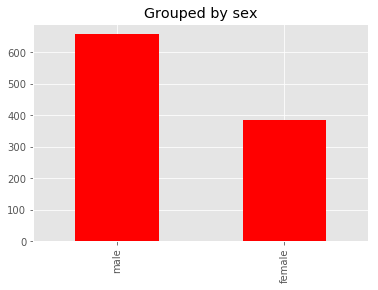

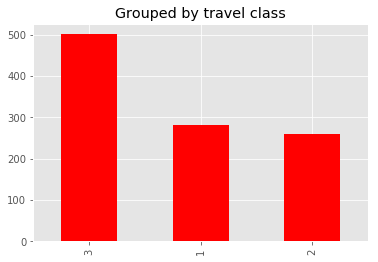

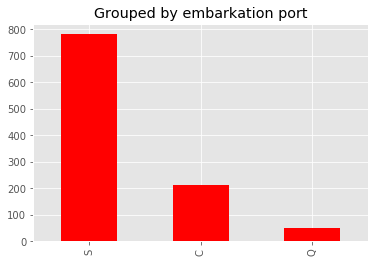

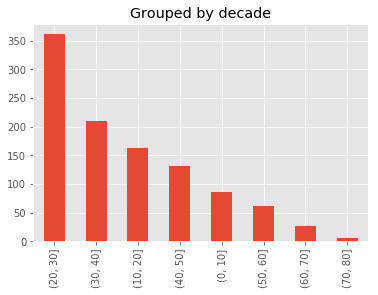

In [299]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

#Plot histograms for the *travel class*, *embarkation port*,
#*sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 

clean_frame['sex'].value_counts().plot(kind='bar', color=['r','g'], title='Grouped by sex')
plt.show()

clean_frame['pclass'].value_counts().plot(kind='bar', color=['r','g','b'], title='Grouped by travel class')
plt.show()

clean_frame['embarked'].value_counts().plot(kind='bar', color=['r','g','b'], title='Grouped by embarkation port')
plt.show()

pd.cut(clean_frame.age, [0,10,20,30,40,50,60,70,80]).value_counts().plot(kind='bar', title='Grouped by decade')
plt.show()

### 3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.

In [300]:
for c in clean_frame.cabin.values:
    if len(str(c).split(' '))>1:
        print(c) 

C22 C26
C22 C26
C22 C26
C22 C26
C62 C64
C62 C64
B58 B60
B58 B60
B51 B53 B55
B51 B53 B55
B51 B53 B55
B96 B98
B96 B98
B96 B98
B96 B98
B58 B60
C23 C25 C27
C23 C25 C27
C23 C25 C27
C23 C25 C27
C23 C25 C27
C23 C25 C27
D10 D12
D10 D12
B82 B84
B52 B54 B56
B57 B59 B63 B66
B57 B59 B63 B66
B57 B59 B63 B66
B57 B59 B63 B66
B57 B59 B63 B66
C55 C57
C55 C57
E39 E41
F G63
F G63
F E57
F G73
F G73


According to [this](https://www.encyclopedia-titanica.org/titanic-deckplans/g-deck.html) map, we assume that the starting letter for each value represent the floor on which the person stays. For the cases where we have for exemple 'F G63' we assume that the person stayed on floor F in part G cabin 63. When there are more than one value as cabin for the same person we noticed that these cabins are always on the same floor (showed above). 

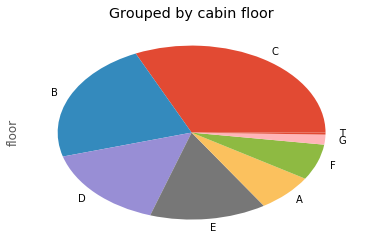

In [301]:
#Calculate the proportion of passengers by cabin floor. Present your results in a pie chart

#Add new column named floor
clean_frame['floor'] = clean_frame.cabin.dropna().map(lambda f: f[0])
#Make it categorical 
clean_frame['floor'] = clean_frame.floor.astype('category')
#Show the piechart
clean_frame['floor'].value_counts().plot(kind='pie', title='Grouped by cabin floor')
plt.show()

### 4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.

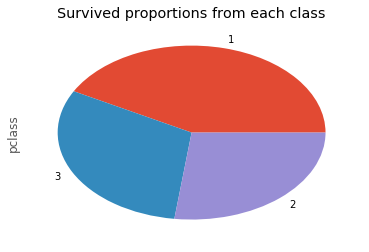

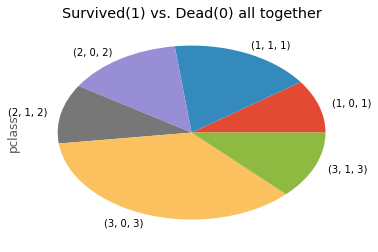

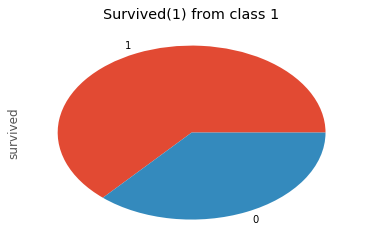

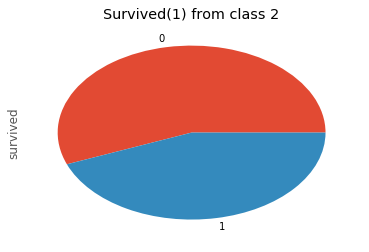

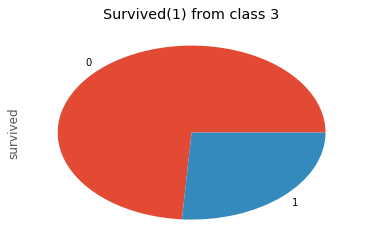

In [302]:
clean_frame[clean_frame.survived==1]['pclass'].value_counts().plot(kind='pie', title='Survived proportions from each class')
plt.show()
clean_frame.groupby(['pclass', 'survived']).pclass.value_counts().plot(kind='pie', title='Survived(1) vs. Dead(0) all together')
plt.show()
clean_frame[clean_frame.pclass==1]['survived'].value_counts().plot(kind='pie', title='Survived(1) from class 1')
plt.show()
clean_frame[clean_frame.pclass==2]['survived'].value_counts().plot(kind='pie', title='Survived(1) from class 2')
plt.show()
clean_frame[clean_frame.pclass==3]['survived'].value_counts().plot(kind='pie', title='Survived(1) from class 3')
plt.show()

### 5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.

Here we select only passengers that survived, we group them by `pclass` and `sex` and then we count the survived passengers for each group. 

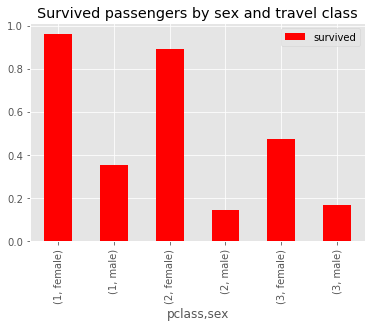

In [414]:
totals = clean_frame.groupby(['pclass', 'sex'])
totals = pd.DataFrame(totals.survived.value_counts())
totals = totals.groupby(['pclass', 'sex']).sum()

grouped = clean_frame[clean_frame.survived==1].groupby(['pclass', 'sex'])
grouped = pd.DataFrame(grouped.survived.value_counts()).reset_index(level=2, drop=True)
grouped['survived'] /= totals['survived']

grouped.plot(kind='bar', color=['r','g','b','m','y', 'c'], title='Survived passengers by sex and travel class')
plt.show()

### 6. Create 2 equally populated age categories and calculate survival proportions by age category, travel class and sex. Present your results in a `DataFrame` with unique index.

Here we create a new column by_ages that contains the two different age categories: \[0.167, 28\] and (28, 80]. The two age categories doesn't have exactly the same number of passengers since splitting people of age 28 in two different groups doesn't look as proper solution. 

In [415]:
by_ages = pd.qcut(clean_frame.age, 2)
clean_frame['by_ages'] = by_ages

grouped = clean_frame[clean_frame.survived==1].groupby(['by_ages', 'pclass', 'sex'])
totals = clean_frame.groupby(['by_ages', 'pclass', 'sex'])
totals = pd.DataFrame(totals.survived.value_counts())
totals = totals.groupby(['by_ages', 'pclass', 'sex']).sum()
survived = pd.DataFrame(grouped.survived.value_counts()).reset_index(level=3, drop=True)

survived['survived'] /= totals['survived']
survived['survived'] = survived['survived'].apply(lambda x: '{:.2f} %'.format(x * 100))
survived

survived
by_ages       pclass sex            
(0.166, 28.0] 1      female  95.12 %
                     male    53.12 %
              2      female  91.07 %
                     male    21.62 %
              3      female  51.38 %
                     male    18.30 %
(28.0, 80.0]  1      female  96.67 %
                     male    30.25 %
              2      female  87.23 %
                     male     8.33 %
              3      female  37.21 %
                     male    14.40 %